In [72]:
#| echo: false
#| warning: false
library(tidyverse)
options(repr.matrix.min.rows = 6)
options(tibble.print_min=6)

## 유용한 함수들

- `select()`, `mutate()`, `filter()`, `rename()` : 기본 tidyverse verbs  
- `rowSums()`, `rowMeans()` : composite 변수들의 합 또는 평균을 구함  
- `factor()` : 카테고리 변수의 변환

앞서 다운받은 데이터: [altruism.csv 파일 링크](https://www.dropbox.com/s/fvuoi6jev84bnkc/altruism.csv?dl=1)

In [73]:
#| warning: false
library(tidyverse)

# import data
helping <- read_csv("data/altruism.csv")
helping |> print()

Rows: 120 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (12): id, pho_1, pho_2, pho_3, sex, age, emp_q20, emp_q22, emp_q23, emp_...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 120 x 12
     id pho_1 pho_2 pho_3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1     1    95    95    95     1  2004      80      NA      80      80      70
2     2    58    62    NA     0  2003      62      58      59      57      56
3     3   100    50    50    NA  2003      90      51      51      51      52
4     4    77    77    64     1  2004      66      72      88      82      67
5     5    NA    NA    NA    NA    NA      NA      NA      NA      NA      NA
6     6   100    75   100     0  2004     100      60      70      55      70
# i 114 more rows
# i 1 more variable: emp_q26 <dbl>


### 변수명 수정
`rename()`

In [74]:
helping |>
    rename(ph1 = pho_1, ph2 = pho_2, ph3 = pho_3) |>
    print()

# A tibble: 120 x 12
     id   ph1   ph2   ph3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1     1    95    95    95     1  2004      80      NA      80      80      70
2     2    58    62    NA     0  2003      62      58      59      57      56
3     3   100    50    50    NA  2003      90      51      51      51      52
4     4    77    77    64     1  2004      66      72      88      82      67
5     5    NA    NA    NA    NA    NA      NA      NA      NA      NA      NA
6     6   100    75   100     0  2004     100      60      70      55      70
# i 114 more rows
# i 1 more variable: emp_q26 <dbl>


변형 후에는 꼭 변수에 **assign!**

In [75]:
helping <-     # 원래 데이터에 overwrite
    helping |>
    rename(ph1 = pho_1, ph2 = pho_2, ph3 = pho_3)

helping |> print()

# A tibble: 120 x 12
     id   ph1   ph2   ph3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1     1    95    95    95     1  2004      80      NA      80      80      70
2     2    58    62    NA     0  2003      62      58      59      57      56
3     3   100    50    50    NA  2003      90      51      51      51      52
4     4    77    77    64     1  2004      66      72      88      82      67
5     5    NA    NA    NA    NA    NA      NA      NA      NA      NA      NA
6     6   100    75   100     0  2004     100      60      70      55      70
# i 114 more rows
# i 1 more variable: emp_q26 <dbl>


### 문항을 더할 때
`rowSums(row, na.rm = TRUE)` 함수를 이용하는 것이 직접 덧셈보다 더 적절함

`ph1`, `ph2`, `ph3` 세 문항을 더하려면,

In [76]:
# 먼저 문항을 선택/확인
helping |>
  select(ph1:ph3) |> # position!
  print()

# A tibble: 120 x 3
    ph1   ph2   ph3
  <dbl> <dbl> <dbl>
1    95    95    95
2    58    62    NA
3   100    50    50
4    77    77    64
5    NA    NA    NA
6   100    75   100
# i 114 more rows


In [77]:
helping |>
  select(ph1:ph3) |>
  rowSums(na.rm = TRUE) |>
  print()

  [1] 285 120 200 218   0 275 257 178 256 189 215 226 209 246 159 197 205 225
 [19] 150 195  44   0   0 125 225 211 270 176 241 205   0 220  98  79 143 165
 [37]  49 294 300 292 101 285 208 230 255 150 299 188 208 205 138 267 187 300
 [55] 195 300 236  59 226 193 213 250  32 228 250 300 300 190 230 281 196 268
 [73] 240 250  39 233 211 198 199 234 300 215 240   9 261 209 281 201 270 255
 [91] 177 235 161   0 242 151 182 170   3 222 172 194 300 300 293 238 243 260
[109] 197 294 280 195 255   1 162 278 176 262 300 164


In [78]:
helping["phone"] <-    # "phone"이라는 새로운 변수에 assign!
  helping |>
  select(ph1:ph3) |>
  rowSums(na.rm = TRUE)

helping |> print(width = Inf)

# A tibble: 120 x 13
     id   ph1   ph2   ph3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1     1    95    95    95     1  2004      80      NA      80      80      70
2     2    58    62    NA     0  2003      62      58      59      57      56
3     3   100    50    50    NA  2003      90      51      51      51      52
4     4    77    77    64     1  2004      66      72      88      82      67
5     5    NA    NA    NA    NA    NA      NA      NA      NA      NA      NA
6     6   100    75   100     0  2004     100      60      70      55      70
  emp_q26 phone
    <dbl> <dbl>
1      70   285
2      59   120
3     100   200
4      69   218
5      NA     0
6      90   275
# i 114 more rows


::: {.callout-note}
다음과 같이 직접 더하는 것은 부적절
```r
helping |>
  mutate(phone = ph1 + ph2 + ph3) 
#      id   ph1   ph2   ph3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
#   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
# 1     1    95    95    95     1  2004      80      NA      80      80      70
# 2     2    58    62    NA     0  2003      62      58      59      57      56
# 3     3   100    50    50    NA  2003      90      51      51      51      52
# 4     4    77    77    64     1  2004      66      72      88      82      67
# 5     5    NA    NA    NA    NA    NA      NA      NA      NA      NA      NA
# 6     6   100    75   100     0  2004     100      60      70      55      70
#   emp_q26 phone
#     <dbl> <dbl>
# 1      70   285
# 2      59    NA
# 3     100   200
# 4      69   218
# 5      NA    NA
# 6      90   275
# # … with 114 more rows
```
:::

### 문항을 평균낼 때
`rowMeans(row, na.rm = TRUE)` 함수를 이용하는 것이 적절함

In [79]:
# 먼저, 평균을 낼 문항을 선택/확인
helping |>
  select(emp_q20, emp_q22:emp_q26) |>  # ":" operator와 "," 섞어써도 무방
  print()

# A tibble: 120 x 6
  emp_q20 emp_q22 emp_q23 emp_q24 emp_q25 emp_q26
    <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1      80      NA      80      80      70      70
2      62      58      59      57      56      59
3      90      51      51      51      52     100
4      66      72      88      82      67      69
5      NA      NA      NA      NA      NA      NA
6     100      60      70      55      70      90
# i 114 more rows


In [80]:
helping["persp"] <- helping |>    # "persp"라는 새로운 변수에 assign!
  select(emp_q20, emp_q22:emp_q26) |>
  rowMeans(na.rm = TRUE)

helping |> print(width = Inf)


# A tibble: 120 x 14
     id   ph1   ph2   ph3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1     1    95    95    95     1  2004      80      NA      80      80      70
2     2    58    62    NA     0  2003      62      58      59      57      56
3     3   100    50    50    NA  2003      90      51      51      51      52
4     4    77    77    64     1  2004      66      72      88      82      67
5     5    NA    NA    NA    NA    NA      NA      NA      NA      NA      NA
6     6   100    75   100     0  2004     100      60      70      55      70
  emp_q26 phone persp
    <dbl> <dbl> <dbl>
1      70   285  76  
2      59   120  58.5
3     100   200  65.8
4      69   218  74  
5      NA     0 NaN  
6      90   275  74.2
# i 114 more rows


::: {.callout-note}
Tidyverse에서 [row-wise operation](https://dplyr.tidyverse.org/articles/rowwise.html)을 하려면,
```r
helping |>
    rowwise() |>
    mutate(persp = mean(c(emp_q20, c_across(emp_q22:emp_q26)), na.rm = TRUE)) |>
    ungroup()
```
참고: [column-wise operation](https://dplyr.tidyverse.org/articles/colwise.html)
:::

### 표준화 및 중심화

- 표준화(standardize): `scale(x)` 함수를 이용
- 중심화(center): `scale(x, scale = FALSE)` 함수를 이용

In [81]:
helping |> 
    mutate(
        phone_z = scale(phone) %>% as.vector,  # scale()은 matrix로 반환; vector 변환 필요
        persp_z = scale(persp) %>% as.vector
    ) |>
    print(n = 3, width = Inf)

# A tibble: 120 x 16
     id   ph1   ph2   ph3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1     1    95    95    95     1  2004      80      NA      80      80      70
2     2    58    62    NA     0  2003      62      58      59      57      56
3     3   100    50    50    NA  2003      90      51      51      51      52
  emp_q26 phone persp  phone_z persp_z
    <dbl> <dbl> <dbl>    <dbl>   <dbl>
1      70   285  76    1.05      0.104
2      59   120  58.5 -1.00     -0.981
3     100   200  65.8 -0.00643  -0.527
# i 117 more rows


`across()` 함수를 이용하면 여러 변수를 한 번에 변환할 수 있음

In [82]:
helping |> 
    mutate(across(.cols = c(phone, persp),
                  .fns = ~(scale(.) %>% as.vector),
                  .names = "{.col}_z")) |>  # 변수명을 일괄 변경: 변수명 + "_z"
    print(n = 3, width = Inf)

# A tibble: 120 x 16
     id   ph1   ph2   ph3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1     1    95    95    95     1  2004      80      NA      80      80      70
2     2    58    62    NA     0  2003      62      58      59      57      56
3     3   100    50    50    NA  2003      90      51      51      51      52
  emp_q26 phone persp  phone_z persp_z
    <dbl> <dbl> <dbl>    <dbl>   <dbl>
1      70   285  76    1.05      0.104
2      59   120  58.5 -1.00     -0.981
3     100   200  65.8 -0.00643  -0.527
# i 117 more rows


### 카테고리 변수 및 연산
카테고리 변수는 R의 **factor** 타입으로 바꾸어 분석하는 것이 유리함.  

간단한 연산은 직접 계산.  

In [83]:
helping |>
  mutate(
    sex = factor(sex, levels = c(0, 1), labels = c("male", "female")),  # factor 타입의 변수로 변환
    age = 2023 - age  # 출생년도로부터 나이 계산
  ) |>
  print(width = Inf)

# A tibble: 120 x 14
     id   ph1   ph2   ph3 sex      age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <fct>  <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1     1    95    95    95 female    19      80      NA      80      80      70
2     2    58    62    NA male      20      62      58      59      57      56
3     3   100    50    50 NA        20      90      51      51      51      52
4     4    77    77    64 female    19      66      72      88      82      67
5     5    NA    NA    NA NA        NA      NA      NA      NA      NA      NA
6     6   100    75   100 male      19     100      60      70      55      70
  emp_q26 phone persp
    <dbl> <dbl> <dbl>
1      70   285  76  
2      59   120  58.5
3     100   200  65.8
4      69   218  74  
5      NA     0 NaN  
6      90   275  74.2
# i 114 more rows


### 행의 삭제
`filter()`를 활용

예를 들어, 5번째 행을 지우려면

In [84]:
helping |>
    filter(!id == 5) |> # !는 not의 의미
    print()

# 다시 helping에 assign 해야 수정됨!

# A tibble: 119 x 14
     id   ph1   ph2   ph3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1     1    95    95    95     1  2004      80      NA      80      80      70
2     2    58    62    NA     0  2003      62      58      59      57      56
3     3   100    50    50    NA  2003      90      51      51      51      52
4     4    77    77    64     1  2004      66      72      88      82      67
5     6   100    75   100     0  2004     100      60      70      55      70
6     7    77    94    86     1  2004      91      93      85      91      73
# i 113 more rows
# i 3 more variables: emp_q26 <dbl>, phone <dbl>, persp <dbl>


여러 행을 지우려면?  
`%in%` 응용

In [85]:
helping |>
    filter(!id %in% c(1, 3, 5)) |> # !는 not의 의미
    print()

# A tibble: 117 x 14
     id   ph1   ph2   ph3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1     2    58    62    NA     0  2003      62      58      59      57      56
2     4    77    77    64     1  2004      66      72      88      82      67
3     6   100    75   100     0  2004     100      60      70      55      70
4     7    77    94    86     1  2004      91      93      85      91      73
5     8    90    68    20     0  2004      67      66      31      67      63
6     9   100    79    77     0  2003      61      51      30      51      51
# i 111 more rows
# i 3 more variables: emp_q26 <dbl>, phone <dbl>, persp <dbl>


### 열의 삭제
`select()` 활용

`emp_q23`, `emp_q25` 두 열을 삭제

In [86]:
helping |>
    select(-emp_q23, -emp_q25) |>
    print()

# A tibble: 120 x 12
     id   ph1   ph2   ph3   sex   age emp_q20 emp_q22 emp_q24 emp_q26 phone
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl> <dbl>
1     1    95    95    95     1  2004      80      NA      80      70   285
2     2    58    62    NA     0  2003      62      58      57      59   120
3     3   100    50    50    NA  2003      90      51      51     100   200
4     4    77    77    64     1  2004      66      72      82      69   218
5     5    NA    NA    NA    NA    NA      NA      NA      NA      NA     0
6     6   100    75   100     0  2004     100      60      55      90   275
# i 114 more rows
# i 1 more variable: persp <dbl>


`emp_q23`부터 `emp_q26` 열을 삭제 (위치의 의미로)

In [87]:
helping |>
    select(-(emp_q23:emp_q26)) |>  # () 꼭 필요
    print()

# A tibble: 120 x 10
     id   ph1   ph2   ph3   sex   age emp_q20 emp_q22 phone persp
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl> <dbl> <dbl>
1     1    95    95    95     1  2004      80      NA   285  76  
2     2    58    62    NA     0  2003      62      58   120  58.5
3     3   100    50    50    NA  2003      90      51   200  65.8
4     4    77    77    64     1  2004      66      72   218  74  
5     5    NA    NA    NA    NA    NA      NA      NA     0 NaN  
6     6   100    75   100     0  2004     100      60   275  74.2
# i 114 more rows


## 이상치 발견
Outliers을 찾는 방법은 다양하고 복잡한 테크닉을 요하기도 하는데, 앞으로 점차 익히게 될 것임

예를 들어, `age`에 잘못 기입한 경우가 있는데

In [88]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 95)

Rows: 120 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (12): id, pho_1, pho_2, pho_3, sex, age, emp_q20, emp_q22, emp_q23, emp_...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_bin()`)."


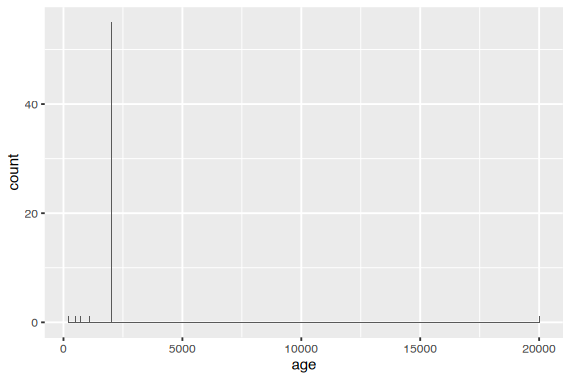

In [119]:
#| warning: false
helping <- read_csv("data/altruism.csv")

helping |>
    ggplot(aes(x = age)) +
    geom_histogram(binwidth = 1)

`age`는 출생년도를 물어봤으나 다른 답을 한 경우들이 있음  
값은 2002 ~ 2004 사이가 정상이므로 `filter()`를 써서 확인해 볼 수 있음

In [120]:
helping |>
    filter(age < 2002 | age > 2004) |>
    print()

# A tibble: 7 x 12
     id pho_1 pho_2 pho_3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1    11    65    94    56     1   203      62      86      58      47      62
2    21    17    10    17     1 20004       0       6       1       0       4
3    43    90    88    30     1   507     100      78      62     100      78
4    52   100    82    85     1   723      87      83      89     100      88
5    59    76    86    64     0   709     100      93      67      94      79
6   108    75   100    85     1  2005     100     100     100     100      97
7   118    92    76    94     0  1108      55      51      51      60      53
# i 1 more variable: emp_q26 <dbl>


값을 수정

In [121]:
# 이상치에 대한 id를 우선 추출
ids_anomaly = helping |>
    filter(age < 2002 | age > 2004) |>
    pull(id)  # vector로 반환
ids_anomaly |> print()

[1]  11  21  43  52  59 108 118


In [ ]:
# 모두 NA로 변경하는 경우
helping |>
    # ifelse(조건, 참일 때 값, 거짓일 때 값)
    mutate(
        age = ifelse(age > 2004, 2004, age),
        age = ifelse(age < 2002, NA, age)
        # 대신, age = ifelse(age > 2004, 2004, ifelse(age < 2002, NA, age))
        ) |> 
    filter(id %in% ids_anomaly) |> 
    print()

# A tibble: 7 x 12
     id pho_1 pho_2 pho_3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1    11    65    94    56     1    NA      62      86      58      47      62
2    21    17    10    17     1  2004       0       6       1       0       4
3    43    90    88    30     1    NA     100      78      62     100      78
4    52   100    82    85     1    NA      87      83      89     100      88
5    59    76    86    64     0    NA     100      93      67      94      79
6   108    75   100    85     1  2004     100     100     100     100      97
7   118    92    76    94     0    NA      55      51      51      60      53
# i 1 more variable: emp_q26 <dbl>


In [117]:
# 직접 입력하는 방식
helping[helping$id %in% ids_anomaly, "age"] |> print()

# A tibble: 7 x 1
    age
  <dbl>
1   203
2 20004
3   507
4   723
5   709
6  2005
7  1108


In [118]:
# 직접 입력하는 방식
helping[helping$id %in% ids_anomaly, "age"] <- c(NA, 2004, NA, NA, NA, 2005, NA)
helping |>
    filter(id %in% ids_anomaly) |>
    print()

# A tibble: 7 x 12
     id pho_1 pho_2 pho_3   sex   age emp_q20 emp_q22 emp_q23 emp_q24 emp_q25
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1    11    65    94    56     1    NA      62      86      58      47      62
2    21    17    10    17     1  2004       0       6       1       0       4
3    43    90    88    30     1    NA     100      78      62     100      78
4    52   100    82    85     1    NA      87      83      89     100      88
5    59    76    86    64     0    NA     100      93      67      94      79
6   108    75   100    85     1  2005     100     100     100     100      97
7   118    92    76    94     0    NA      55      51      51      60      53
# i 1 more variable: emp_q26 <dbl>


## 샘플 R script

In [123]:
#| warning: false
library(tidyverse)

# import data
helping <- read_csv("data/altruism.csv")

# rename
helping <- helping |>
  rename(ph1 = pho_1, ph2 = pho_2, ph3 = pho_3) 

# delete reponses
helping <- helping |>
  filter(!id == 5)

# scoring
helping["phone"] <- helping |>
  select(ph1:ph3) |>
  rowMeans(na.rm = TRUE)

helping["persp"] <- helping |> 
  select(emp_q20, emp_q22, emp_q24:emp_q26) |>
  rowMeans(na.rm = TRUE)

# substitute anolamies
helping <- helping |>
  mutate(age = ifelse(age > 2004, 2004, ifelse(age < 2002, NA, age)))

# factors and etc.
helping <- helping |>
  mutate(
    sex = factor(sex, levels = c(0, 1), labels = c("male", "female")),
    age = 2023 - age
  )

# select variables
helping <- helping |>
  select(id, sex, age, phone, persp)

Rows: 120 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (12): id, pho_1, pho_2, pho_3, sex, age, emp_q20, emp_q22, emp_q23, emp_...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


정리된 파일로 분석 시작!

In [127]:
helping |> print()

# A tibble: 119 x 5
     id sex      age phone persp
  <dbl> <fct>  <dbl> <dbl> <dbl>
1     1 female    19  95    75  
2     2 male      20  60    58.4
3     3 NA        20  66.7  68.8
4     4 female    19  72.7  71.2
5     6 male      19  91.7  75  
6     7 female    19  85.7  82.6
# i 113 more rows
